In [2]:
!pip install --upgrade --force-reinstall numpy gensim scikit-learn nltk

from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
  Using cached scikit_learn-1.6.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached smart_open-7.1.0-py3-none-any.whl.metadata (24 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
  Using cached click-8.1.8-py3-none-any.whl.metadata (2.3 kB)
  Using cached regex-2024.11.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (40 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.me

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
import nltk
nltk.download('all')  # This ensures nothing is missing

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_r

True

In [4]:
corpus = [
    "Natural language processing is a subfield of artificial intelligence.",
    "Word embeddings are used to represent words in vector space.",
    "Word2Vec is a popular algorithm to learn word embeddings.",
    "Similar words are closer in the embedding space.",
    "NLP enables machines to understand human language."
]

# Tokenize each sentence into lowercase words
tokenized_corpus = [word_tokenize(sentence.lower()) for sentence in corpus]
print("Tokenized Corpus:")
print(tokenized_corpus)

Tokenized Corpus:
[['natural', 'language', 'processing', 'is', 'a', 'subfield', 'of', 'artificial', 'intelligence', '.'], ['word', 'embeddings', 'are', 'used', 'to', 'represent', 'words', 'in', 'vector', 'space', '.'], ['word2vec', 'is', 'a', 'popular', 'algorithm', 'to', 'learn', 'word', 'embeddings', '.'], ['similar', 'words', 'are', 'closer', 'in', 'the', 'embedding', 'space', '.'], ['nlp', 'enables', 'machines', 'to', 'understand', 'human', 'language', '.']]


In [5]:
# Train Word2Vec Model

model = Word2Vec(
    sentences=tokenized_corpus,
    vector_size=100,  # dimensionality of word vectors
    window=5,         # context window size
    min_count=1,      # include all words
    workers=4,        # number of CPU threads
    sg=1              # use skip-gram; sg=0 uses CBOW
)


In [6]:
# Find Similar Words Using Cosine Similarity

# Find top 5 similar words to 'language'
similar_words = model.wv.most_similar('language', topn=5)
print("\nTop 5 words similar to 'language':")
for word, score in similar_words:
    print(f"{word:<10} → Similarity Score: {score:.4f}")



Top 5 words similar to 'language':
of         → Similarity Score: 0.2527
closer     → Similarity Score: 0.2015
enables    → Similarity Score: 0.1762
words      → Similarity Score: 0.1712
intelligence → Similarity Score: 0.1501


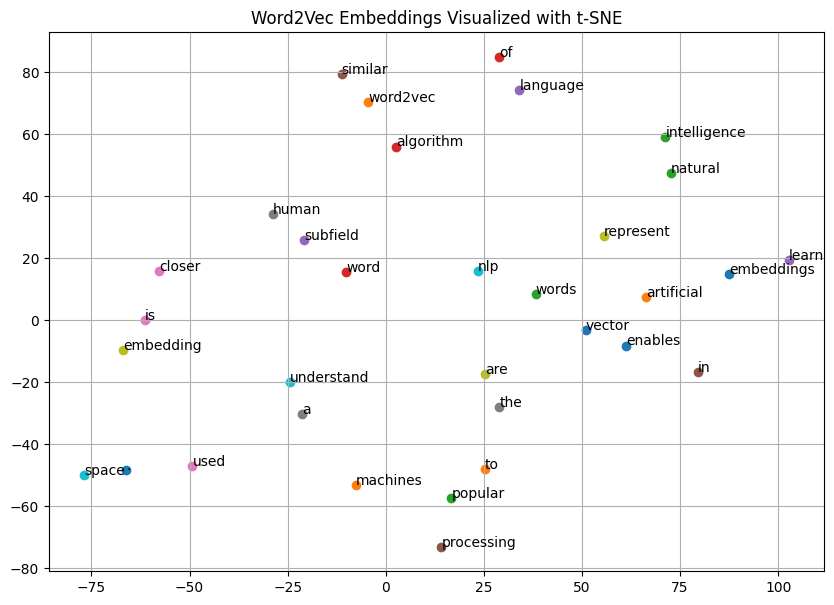

In [8]:
# Visualize Word Embeddings with t-SNE
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Get word vectors and labels
words = list(model.wv.index_to_key)
word_vectors = model.wv[words]

# Reduce 100D vectors to 2D using t-SNE
tsne = TSNE(n_components=2, random_state=0, perplexity=5)
word_vectors_2d = tsne.fit_transform(word_vectors)

# Plot using matplotlib
plt.figure(figsize=(10, 7))
for i, word in enumerate(words):
    x, y = word_vectors_2d[i]
    plt.scatter(x, y)
    plt.annotate(word, (x + 0.02, y + 0.02))
plt.title("Word2Vec Embeddings Visualized with t-SNE")
plt.grid(True)
plt.show()
